In [1]:
import matplotlib.pyplot as plt
import numpy as np


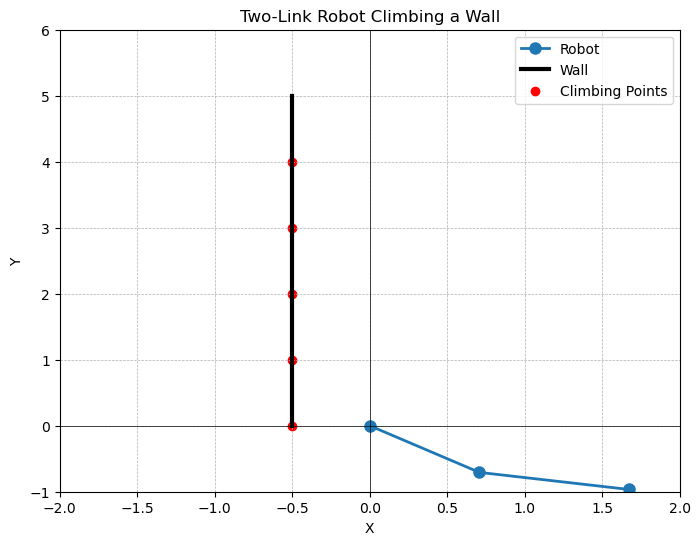

In [2]:

def draw_robot_and_wall(theta1, theta2, L1=1, L2=1, wall_height=5, anchor_distance=1):
    """
    Draws a two-link robot and a wall with climbing points.
    
    Parameters:
    - theta1: Angle of the first link relative to the vertical (in radians).
    - theta2: Angle of the second link relative to theta1 (in radians).
    - L1: Length of the first link.
    - L2: Length of the second link.
    - wall_height: Height of the wall.
    - anchor_distance: Vertical distance between climbing points.
    """
    # Calculate joint and end effector positions
    x_joint = L1 * np.sin(theta1)
    y_joint = -L1 * np.cos(theta1)
    x_end = x_joint + L2 * np.sin(theta1 + theta2)
    y_end = y_joint - L2 * np.cos(theta1 + theta2)
    
    # Define the wall and climbing points
    wall_x = [-0.5, -0.5]
    wall_y = [0, wall_height]
    anchor_x = [-0.5] * int(wall_height / anchor_distance)
    anchor_y = [y for y in np.arange(0, wall_height, anchor_distance)]
    
    # Plotting
    plt.figure(figsize=(8, 6))
    plt.plot([0, x_joint, x_end], [0, y_joint, y_end], '-o', label='Robot', linewidth=2, markersize=8)
    plt.plot(wall_x, wall_y, 'k-', linewidth=3, label='Wall')
    plt.scatter(anchor_x, anchor_y, c='red', label='Climbing Points')
    
    # Formatting the plot
    plt.xlim(-2, max(L1 + L2, 2))
    plt.ylim(-1, wall_height + 1)
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Two-Link Robot Climbing a Wall')
    plt.legend()
    plt.show()

# Example usage
draw_robot_and_wall(theta1=np.pi/4, theta2=np.pi/6, L1=1, L2=1, wall_height=5, anchor_distance=1)


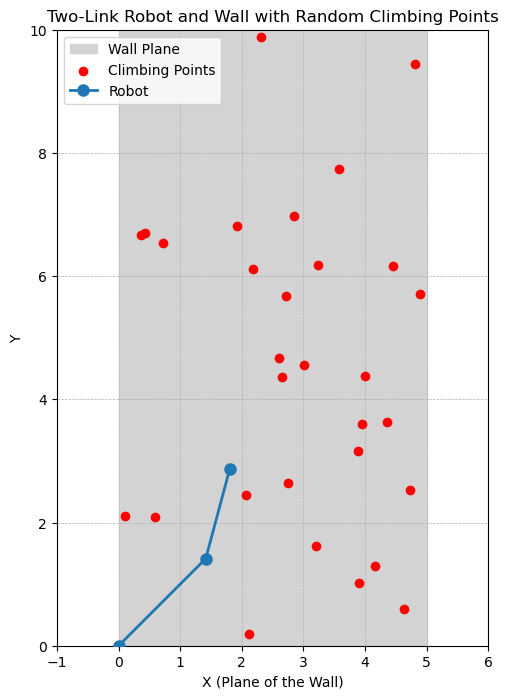

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def draw_robot_in_wall_plane_with_markers(theta1, theta2, L1=1, L2=1, wall_width=5, wall_height=10, num_markers=20):
    """
    Draws a two-link robot in front of a wall plane with random markers.
    
    Parameters:
    - theta1: Angle of the first link relative to the vertical (in radians).
    - theta2: Angle of the second link relative to theta1 (in radians).
    - L1: Length of the first link.
    - L2: Length of the second link.
    - wall_width: Width of the wall plane.
    - wall_height: Height of the wall.
    - num_markers: Number of random markers on the wall.
    """
    # Calculate joint and end effector positions
    x_joint = L1 * np.sin(theta1)
    y_joint = L1 * np.cos(theta1)
    x_end = x_joint + L2 * np.sin(theta1 + theta2)
    y_end = y_joint + L2 * np.cos(theta1 + theta2)
    
    # Generate random markers on the wall
    np.random.seed(0)  # For reproducibility
    markers_x = np.random.uniform(0, wall_width, num_markers)
    markers_y = np.random.uniform(0, wall_height, num_markers)
    
    # Plotting
    plt.figure(figsize=(8, 8))
    plt.fill_betweenx([0, wall_height], 0, wall_width, color='lightgrey', label='Wall Plane')
    plt.scatter(markers_x, markers_y, c='red', label='Climbing Points', zorder=5)
    plt.plot([0, x_joint, x_end], [0, y_joint, y_end], '-o', label='Robot', linewidth=2, markersize=8, zorder=10)
    
    # Formatting the plot
    plt.xlim(-1, wall_width + 1)
    plt.ylim(0, wall_height)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.xlabel('X (Plane of the Wall)')
    plt.ylabel('Y')
    plt.title('Two-Link Robot and Wall with Random Climbing Points')
    plt.legend()
    plt.show()

# Example usage
draw_robot_in_wall_plane_with_markers(theta1=np.pi/4, theta2=-np.pi/6, L1=2, L2=1.5, wall_width=5, wall_height=10, num_markers=30)
